# Dornbusch Model (Lecture 7 December 2023)

$$  ∆E/E = (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) + (∆Θ/Θ - ∆Θ*/Θ*) $$
Made by Vasil Tsenkov, №2993

## 1. Calculate the rate of change of the nominal exchange rate between the two countries.
I used data from [FRED](https://fred.stlouisfed.org/graph/?g=1d1xN), having selected annual data in the period 2006-2016, then edited the graph to show me "Percentage Change from year ago" for the USA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Importing data
deltaE = pd.read_csv(r"D:\dornbush\DEXUSEU(1).csv")
# Renaming columns for readability
deltaE.rename(columns={'DEXUSEU_PC1': '∆E/E'}, inplace=True)
# Changing the observation type to datetime in the date column 
deltaE['DATE'] = pd.to_datetime(deltaE['DATE'], format='%Y-%m-%d')
# Printing the data
print(deltaE)

         DATE      ∆E/E
0  2006-01-01   0.91752
1  2007-01-01   9.13562
2  2008-01-01   7.40279
3  2009-01-01  -5.36567
4  2010-01-01  -4.84071
5  2011-01-01   5.05576
6  2012-01-01  -7.69914
7  2013-01-01   3.28690
8  2014-01-01   0.11530
9  2015-01-01 -16.55005
10 2016-01-01  -0.21766


Text(0, 0.5, '∆E/E (%)')

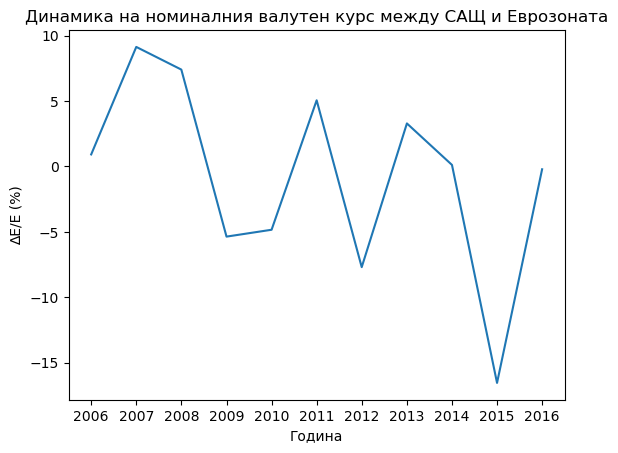

In [4]:
# Ploting the data
plt.plot(deltaE['DATE'], deltaE['∆E/E'])
plt.title("Динамика на номиналния валутен курс между CAЩ и Еврозоната")
plt.xlabel("Година")
plt.ylabel('∆E/E (%)')

## 2. Calculate (∆M/M - ∆M*/M*)

From the FRED page I use a 10 year period and change the graph to show me "Percentage change from Year Ago",
then I do the same for the Eurozone and add it to the already existing chart for the US.
<br>
[Data](https://fred.stlouisfed.org/graph/?g=1cYZ5) 

In [5]:
# Data is imported from CSV type by removing the "." so that it doesn't read it as text
M2UE = pd.read_csv(r"D:\dornbush\fredgraph.csv", na_values = ['.'])
# Columns are renamed for readability
M2UE.rename(columns={'MYAGM2USM052S_PC1': '∆M/M', 'MYAGM2EZM196N_PC1': '∆M*/M*'}, inplace=True)
# The date column must be of type date
M2UE['DATE'] = pd.to_datetime(M2UE['DATE'], format='%Y-%m-%d')
# Columns for delta M2 must be of decimal type
M2UE['∆M/M'] = M2UE['∆M/M'].astype(float)
M2UE['∆M*/M*'] = M2UE['∆M*/M*'].astype(float)
# Column with the difference between the two aggregates
M2UE['(∆M/M - ∆M*/M*)'] = M2UE['∆M/M'] - M2UE['∆M*/M*']
# Print the table
print(M2UE)

         DATE     ∆M/M    ∆M*/M*  (∆M/M - ∆M*/M*)
0  2006-01-01  5.25211   8.98263         -3.73052
1  2007-01-01  6.30146  10.18525         -3.88379
2  2008-01-01  7.11103  10.30564         -3.19461
3  2009-01-01  7.87930   5.31388          2.56542
4  2010-01-01  2.23966   1.96501          0.27465
5  2011-01-01  6.98010   2.37551          4.60459
6  2012-01-01  8.52032   3.47642          5.04390
7  2013-01-01  6.74042   3.74130          2.99912
8  2014-01-01  6.20085   2.83917          3.36168
9  2015-01-01  5.88013   6.09081         -0.21068
10 2016-01-01  6.75075   5.07517          1.67558


## 3. Compare the result of step 2 with the result of step 1

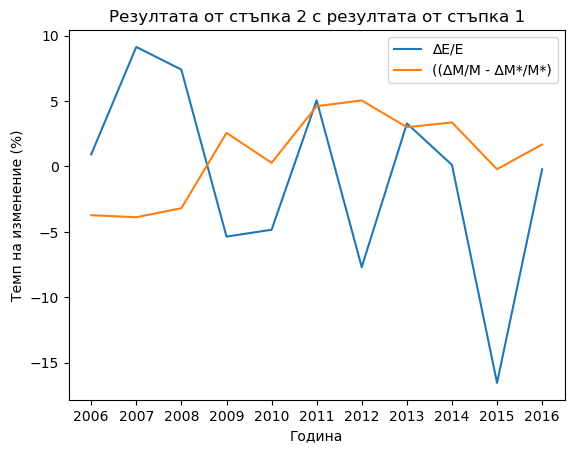

In [6]:
# Plotting the data
plt.plot(deltaE['DATE'], deltaE['∆E/E'], label = '∆E/E')
plt.plot(M2UE['DATE'], M2UE['(∆M/M - ∆M*/M*)'], label = '((∆M/M - ∆M*/M*)')
plt.title("Резултата от стъпка 2 с резултата от стъпка 1")
plt.xlabel("Година")
plt.ylabel('Темп на изменение (%)')
plt.legend()

## 4. Deflate the value of money aggregates at the end of the year with a price index on a base year of your choice that is the same for both countries, and then calculate the rate of change of real money
[Data for HICP, index = 2015](https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_aind__custom_8878464/settings_1/table?lang=en)
As before I have changed the period to show me 2006-2016, to show me only USA and Eurozone, the index = 2015, and I have changed the columns and rows to show me countries and years respectively

In [7]:
HICP = pd.read_excel(r"D:\dornbush\prc_hicp_aind_page_spreadsheet.xlsx", sheet_name = "Sheet 1")
HICP.rename(columns={'Euro area': 'Euro_HICP', 'United States': 'USA_HICP', 'TIME' : 'DATE'}, inplace=True)
HICP['DATE'] = pd.to_datetime(HICP['DATE'], format='%Y')
print(HICP)

         DATE  Euro_HICP  USA_HICP
0  2006-01-01      86.64     85.16
1  2007-01-01      88.49     87.40
2  2008-01-01      91.38     91.22
3  2009-01-01      91.65     90.46
4  2010-01-01      93.14     92.66
5  2011-01-01      95.66     96.20
6  2012-01-01      98.05     98.23
7  2013-01-01      99.38     99.46
8  2014-01-01      99.81    100.76
9  2015-01-01     100.00    100.00
10 2016-01-01     100.23    100.57


[Data for M2, nlog](https://fred.stlouisfed.org/graph/?g=1d1yE). I'm using FRED, I've edited it to show me M2 information for the US and the Eurozone, then I've chosen to show me the absolute value as a logarithm to make it easier to read (maybe a bug!)

In [8]:
M2Log = pd.read_csv(r"D:\dornbush\M2Log.csv")
M2Log.rename(columns={'MYAGM2USM052S': 'M2_USA_log', 'MYAGM2EZM196N': 'M2_Euro_log'}, inplace=True)
M2Log['DATE'] = pd.to_datetime(M2Log['DATE'], format='%Y-%m-%d')
print(M2Log)

         DATE  M2_USA_log  M2_Euro_log
0  2006-01-01    29.55768     29.48319
1  2007-01-01    29.61879     29.58019
2  2008-01-01    29.68749     29.67827
3  2009-01-01    29.76333     29.73005
4  2010-01-01    29.78548     29.74951
5  2011-01-01    29.85295     29.77298
6  2012-01-01    29.93472     29.80716
7  2013-01-01    29.99995     29.84389
8  2014-01-01    30.06011     29.87188
9  2015-01-01    30.11725     29.93101
10 2016-01-01    30.18257     29.98051


In [9]:
# Join the two tables
M2LOGHICP = pd.merge(M2Log, HICP, on = "DATE")
# I create a new column that calculates M2 divided by HICP for both countries
M2LOGHICP["Deflator_USA"] = M2LOGHICP["M2_USA_log"] / M2LOGHICP["USA_HICP"]
M2LOGHICP["Deflator_EU"] = M2LOGHICP["M2_Euro_log"] / M2LOGHICP["Euro_HICP"]

# I use the ".pct_change" function to automatically calculate the percentage change
M2LOGHICP["∆L/L"] = M2LOGHICP["Deflator_USA"].pct_change()
M2LOGHICP["∆L*/L*"] = M2LOGHICP["Deflator_EU"].pct_change()

# I calculate the difference of the two changes in a new column
M2LOGHICP["(∆L*/L* - ∆L/L)"] = M2LOGHICP["∆L*/L*"] - M2LOGHICP["∆L/L"]

# I create a new table with the necessary information
df = pd.DataFrame(M2LOGHICP)
SelectedColumns = ["DATE", "Deflator_USA", "Deflator_EU", "∆L/L", "∆L*/L*", "(∆L*/L* - ∆L/L)"]
print(df[SelectedColumns])

         DATE  Deflator_USA  Deflator_EU      ∆L/L    ∆L*/L*  (∆L*/L* - ∆L/L)
0  2006-01-01      0.347084     0.340295       NaN       NaN              NaN
1  2007-01-01      0.338888     0.334277 -0.023615 -0.017685         0.005930
2  2008-01-01      0.325449     0.324779 -0.039654 -0.028415         0.011239
3  2009-01-01      0.329022     0.324387  0.010978 -0.001206        -0.012184
4  2010-01-01      0.321449     0.319406 -0.023016 -0.015353         0.007663
5  2011-01-01      0.310322     0.311238 -0.034616 -0.025575         0.009041
6  2012-01-01      0.304741     0.304000 -0.017983 -0.023255        -0.005272
7  2013-01-01      0.301628     0.300301 -0.010215 -0.012167        -0.001953
8  2014-01-01      0.298334     0.299287 -0.010922 -0.003374         0.007548
9  2015-01-01      0.301173     0.299310  0.009515  0.000076        -0.009440
10 2016-01-01      0.300115     0.299117 -0.003511 -0.000645         0.002866


## 6. Calculate (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) and compare it to part 1

In [11]:
# I merge the two necessary columns that we need
Q6 = pd.merge(M2UE[['DATE', '(∆M/M - ∆M*/M*)']], M2LOGHICP[['DATE', '(∆L*/L* - ∆L/L)']], on='DATE', how='outer')

# I calculate the difference in new column
Q6["(∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L)"] = Q6["(∆M/M - ∆M*/M*)"] + Q6["(∆L*/L* - ∆L/L)"]
print(Q6)

         DATE  (∆M/M - ∆M*/M*)  (∆L*/L* - ∆L/L)  \
0  2006-01-01         -3.73052              NaN   
1  2007-01-01         -3.88379         0.005930   
2  2008-01-01         -3.19461         0.011239   
3  2009-01-01          2.56542        -0.012184   
4  2010-01-01          0.27465         0.007663   
5  2011-01-01          4.60459         0.009041   
6  2012-01-01          5.04390        -0.005272   
7  2013-01-01          2.99912        -0.001953   
8  2014-01-01          3.36168         0.007548   
9  2015-01-01         -0.21068        -0.009440   
10 2016-01-01          1.67558         0.002866   

    (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L)  
0                                 NaN  
1                           -3.877860  
2                           -3.183371  
3                            2.553236  
4                            0.282313  
5                            4.613631  
6                            5.038628  
7                            2.997167  
8                          

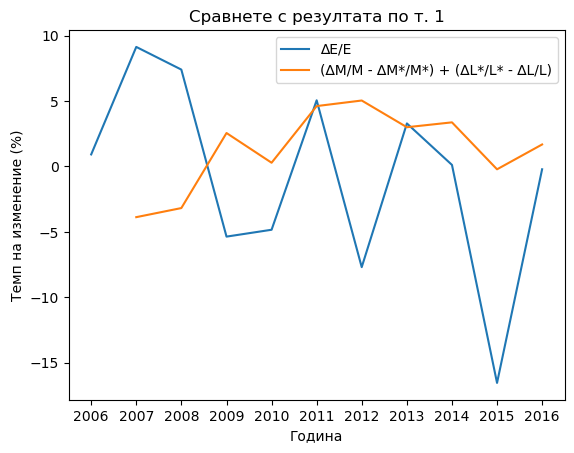

In [12]:
# Plotting the data
plt.plot(deltaE['DATE'], deltaE['∆E/E'], label = "∆E/E")
plt.plot(Q6['DATE'], Q6["(∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L)"], label = "(∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L)")
plt.title("Сравнете с резултата по т. 1")
plt.xlabel("Година")
plt.ylabel('Темп на изменение (%)')
plt.legend()